In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
!pip install git+https://github.com/cphyc/jupyter-notify.git
%reload_ext jupyternotify

### Summarizing

In [2]:
import PyPDF2
import pandas as pd

# Open the pdf file
pdf1 = PyPDF2.PdfReader('Resources/pubmed.pdf')
pdf2 = PyPDF2.PdfReader('Resources/pubmed2.pdf')
pdfs = [pdf1, pdf2]
# Create a dataframe to store the data from each page
texts=[]
names=[]
count=1
for pdf in pdfs:
    name = f'pdf{count}'
    count+=1
    # Get the number of pages in the pdf file
    num_pages = len(pdf.pages)

    # Iterate over the pages in the pdf file
    for i in range(num_pages):

        # Get the text from the current page
        page = pdf.pages[i]
        text = page.extract_text()   

        # Split the text into sections
        sections = text.split('\n\n')
        texts.append(sections[0])
        names.append(name)

# Add the section to the dataframe
pubmed_df = pd.DataFrame({'doc': names, 'page_text': texts})
pubmed_df

,doc,page_text
0,pdf1,\n \nSince January 2020 Elsevier has created ...
1,pdf1,RESEARCH\nCharacteristics of online pharmacies...
2,pdf1,illegitimate and in violation of U.S. pharmacy...
3,pdf1,"illegal, unsafe, or misleading activities like..."
4,pdf1,The safety characteristics of all online pharm...
5,pdf1,phone number listed and an offer to speak with...
6,pdf1,without a prescription.22Our results demonstra...
7,pdf1,"marketplace. In the meantime, organizations sh..."
8,pdf2,The new england journal of medicinen engl j me...
9,pdf2,"n engl j med 380;12 nejm.org March 21, 2019 11..."


In [3]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM

# Set up the summarization pipeline
tokenizer = AutoTokenizer.from_pretrained("t5-base", max_input_length = 1024)
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define a function to generate summaries for each section
def generate_summary(text):
    # Generate a summary of the text using the summarization pipelineb
     
    summary = summarizer(text, max_length=80, min_length=25, do_sample=False)[0]['summary_text']
    return summary

C:\Users\Dan\anaconda3\envs\dev\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:165: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [6]:
%%notify
pubmed_df['Summary'] = pubmed_df['page_text'].apply(generate_summary)

Token indices sequence length is longer than the specified maximum sequence length for this model (1104 > 512). Running this sequence through the model will result in indexing errors


<IPython.core.display.Javascript object>

In [26]:
pubmed_df

,doc,page_text,Summary,Score
0,pdf1,\n \nSince January 2020 Elsevier has created ...,since January 2020 Elsevier has created a COVI...,4
1,pdf1,RESEARCH\nCharacteristics of online pharmacies...,of the 62 online pharmacies found to sell Adde...,4
2,pdf1,illegitimate and in violation of U.S. pharmacy...,96% of the accessible online pharmacies are il...,0
3,pdf1,"illegal, unsafe, or misleading activities like...","traf fic to rogue, unclassi fied, and legitima...",0
4,pdf1,The safety characteristics of all online pharm...,rogue and unclassi fied pharmacies offered som...,0
5,pdf1,phone number listed and an offer to speak with...,of 62 online pharmacies claiming to sell Adder...,0
6,pdf1,without a prescription.22Our results demonstra...,research shows that the no- prescription price...,0
7,pdf1,"marketplace. In the meantime, organizations sh...",a review of the literature on the use and misu...,4
8,pdf2,The new england journal of medicinen engl j me...,"in 2007, the Food and Drug Administration mand...",4
9,pdf2,"n engl j med 380;12 nejm.org March 21, 2019 11...",the most effective treatments are methylphenid...,4


In [13]:
# Specify the file name for the document
output_file = 'Output/Pubmed_Summaries.txt'

# Open the file in write mode and write each 'Summary' to a new line
with open(output_file, 'w') as file:
    for summary in pubmed_df['Summary']:
        file.write(summary + '\n')

In [ ]:
!pip install xformers

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")

In [22]:
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted label
    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    # Return the predicted sentiment
    return predicted_label

In [25]:
%%notify
# Applying to research summaries but function is for adderall reviews
pubmed_df['Score'] = pubmed_df['Summary'].apply(get_sentiment)

<IPython.core.display.Javascript object>

### Analysis:
* Online pharmacies are fraught with illegitimate adderall prescriptions
* The risk of abuse is higher than average with adderall users.
* Adderall users are at risk of new-onset psychosis, however the frequency is between 0.1% and 0.2%.
* Physicians should consider the risks and symptoms of psychosis when prescribing Adderall.

### Review Scores

In [29]:
adhd = pd.read_csv('Resources/adderall.csv')
adhd.head()

,Age,Condition,Date,Drug,Sex,Reviews
0,,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,,No Script or health Insurance needed to place ...
1,25-34,Attention Deficit Disorder with Hyperactivity,2023-01-07,adderall xr,Female,I realize my previous comment was more about m...
2,25-34,Other,2023-01-30,adderall xr,Female,I realize my previous comment was more about m...
3,25-34,Attention Deficit Disorder with Hyperactivity,2023-03-08,adderall xr,Female,"My entire life I felt like I was different, ne..."
4,25-34,Attention Deficit Disorder with Hyperactivity,2023-06-09,adderall xr,Female,Been taking it since I was 10. So over 20 year...


In [30]:
adhd['score'] = adhd['Reviews'].apply(get_sentiment)
adhd.head()

,Age,Condition,Date,Drug,Sex,Reviews,score
0,,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,,No Script or health Insurance needed to place ...,4
1,25-34,Attention Deficit Disorder with Hyperactivity,2023-01-07,adderall xr,Female,I realize my previous comment was more about m...,4
2,25-34,Other,2023-01-30,adderall xr,Female,I realize my previous comment was more about m...,4
3,25-34,Attention Deficit Disorder with Hyperactivity,2023-03-08,adderall xr,Female,"My entire life I felt like I was different, ne...",0
4,25-34,Attention Deficit Disorder with Hyperactivity,2023-06-09,adderall xr,Female,Been taking it since I was 10. So over 20 year...,4


In [32]:
adhd_df = adhd[(adhd['Age'] != ' ') & (adhd['Sex'] != ' ')]

In [33]:
adhd_df['Age'] = adhd_df['Age'].str.replace('3-6', '03-06').str.replace('7-12', '07-12')

C:\Users\Dan\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
adhd_analysis = adhd_df.groupby(['Age', 'Sex'])['score'].mean().reset_index()
adhd_male = adhd_analysis[adhd_analysis['Sex']=='Male']
adhd_female = adhd_analysis[adhd_analysis['Sex']=='Female']

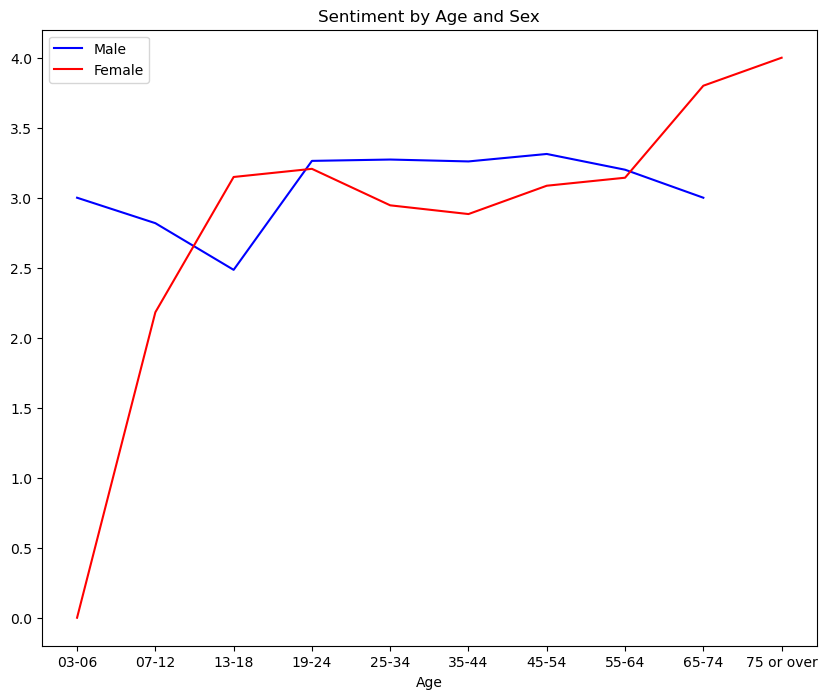

In [35]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
adhd_male.plot.line(x='Age', y='score', c='blue', label='Male', ax=ax, title='Sentiment by Age and Sex')
adhd_female.plot.line(x='Age', y='score', c='red', label='Female', ax=ax)

plt.savefig('Output/ADHD Sentiment by Age and Sex.png')
plt.show()

* Based on this analysis the drug is highly effective for women over the age of 55 and highly problematic for girls under the age of 13.
* Girls and women between 13 and 55 show moderately positive sentiment. 
* Boys and men's sentiment is more consistently positive across the age spectrum.
* Men above 19 are especially consistent with positive sentiment, only dropping off slightly for men above the age of 64.

In [40]:
adhd_df_male = adhd_df[adhd_df['Sex']=='Male']
adhd_df_female = adhd_df[adhd_df['Sex']=='Female']

In [47]:
adhd_df_grandma = adhd_df_female[(adhd_df_female['Age'] == '65-74') | (adhd_df_female['Age'] == '75 or over')]

In [52]:
adhd_df_baby_girl = adhd_df_female[(adhd_df_female['Age'] == '03-06')]

In [54]:
adhd_df_girl = adhd_df_female[(adhd_df_female['Age'] == '07-12')]

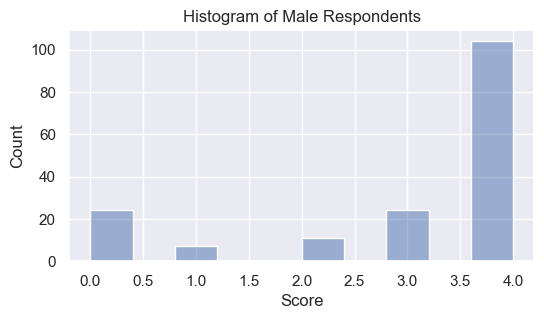

In [67]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(6,3)})
ax = sns.histplot(data=adhd_df_male, legend=False, bins=10, kde=False)
ax.set(xlabel='Score')
plt.title('Histogram of Male Respondents')
plt.savefig('male_reviews.png')

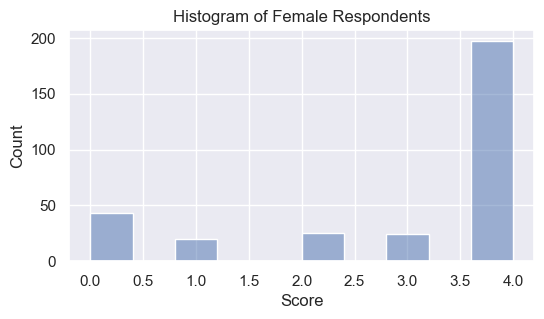

In [68]:
sns.set(rc = {'figure.figsize':(6,3)})
ax = sns.histplot(data=adhd_df_female, legend=False, bins=10, kde=False)
ax.set(xlabel='Score')
plt.title('Histogram of Female Respondents')
plt.savefig('female_reviews.png')

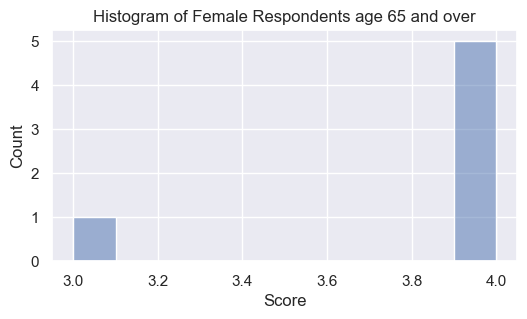

In [72]:
sns.set(rc = {'figure.figsize':(6,3)})
ax = sns.histplot(data=adhd_df_grandma, legend=False, bins=10, kde=False)
ax.set(xlabel='Score')
plt.title('Histogram of Female Respondents age 65 and over')
plt.savefig('elderly_female_reviews.png')

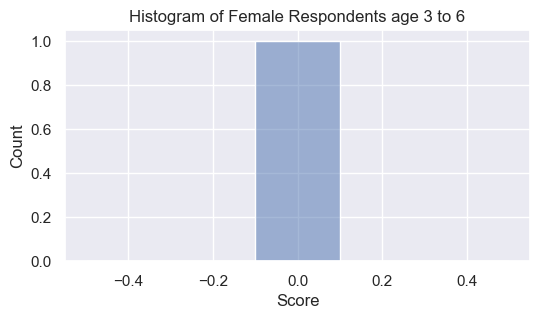

In [74]:
sns.set(rc = {'figure.figsize':(6,3)})
ax = sns.histplot(data=adhd_df_baby_girl, legend=False, bins=5, kde=False)
ax.set(xlabel='Score')
plt.title('Histogram of Female Respondents age 3 to 6')
plt.savefig('baby_girl_reviews.png')

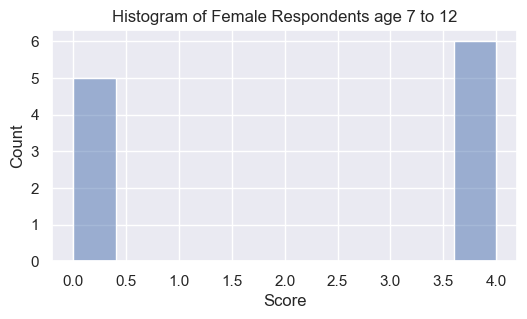

In [76]:
sns.set(rc = {'figure.figsize':(6,3)})
ax = sns.histplot(data=adhd_df_girl, legend=False, bins=10, kde=False)
ax.set(xlabel='Score')
plt.title('Histogram of Female Respondents age 7 to 12')
plt.savefig('girl_reviews.png')